In [1]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import gmaps
import matplotlib.pyplot as plt

# Google developer API key
from config import g_key

In [2]:
# File to Load 
traffic_file = "project_data.csv"

# Read Traffic File and Store into Pandas DataFrame
traffic_df = pd.read_csv(traffic_file)

traffic_df.head(2)

,ACC_ID,ROAD_NO,ROAD_NAME,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,9227453,10355,Povah Rd,122.229302,-17.929427,1/1/16,200.0,PDO Minor,Hit Object,NaN,0,0,0,0,0,0
1,9227808,1020997,Abernethy Rd,115.987176,-31.963001,1/1/16,0.0,PDO Major,Hit Object,NaN,0,0,0,0,0,0


In [3]:
# File to Load 
speedlimit_file = "Legal_Speed_Limits.csv"

# Read Traffic File and Store into Pandas DataFrame
speedlimit_df = pd.read_csv(speedlimit_file)

# Rename "ROAD" column to "ROAD_NO" to have similar column names in both DataFrames
speedlimit_df=speedlimit_df.rename(columns={"ROAD":"ROAD_NO"})

speedlimit_df.head(2)

,OBJECTID,ROAD_NO,ROAD_NAME,COMMON_USAGE_NAME,START_SLK,END_SLK,CWY,START_TRUE_DIST,END_TRUE_DIST,NETWORK_TYPE,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMIT,ROUTE_NE_ID,GEOLOCSTLength
0,47167919,2110042,Hacket Rd,Hacket Rd,0.0,1.15,Single,0.0,1.15,Local Road,2,South West,211,Harvey,50km/h applies in built up areas or 110km/h ou...,218243,0.010896
1,47167920,1071273,Gypsum Cove,Gypsum Cove,0.0,0.12,Single,0.0,0.12,Local Road,7,Metropolitan,107,Rockingham (C),50km/h applies in built up areas or 110km/h ou...,218228,0.001073


In [4]:
# # Merge Traffic and SpeedLimit DataFrames 
# left=pd.DataFrame({"A":traffic_df["ROAD_NO"]})
# right=pd.DataFrame({"A":speedlimit_df["ROAD_NO"],"B":speedlimit_df["SPEED_LIMIT"]}).drop_duplicates()
# right=right.drop_duplicates(["A"])
# merged_df = pd.merge(left, right, how="left", on="A", validate="many_to_one")
# merged_df

In [5]:
# Merge Traffic and SpeedLimit DataFrames 
speedlimit_df=speedlimit_df.drop_duplicates(["ROAD_NO"])
merged_df = pd.merge(traffic_df, speedlimit_df, how="left", on="ROAD_NO", validate="many_to_one")
merged_df.head(2)

,ACC_ID,ROAD_NO,ROAD_NAME_x,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,EVENT_NATURE,EVENT_TYPE,...,START_TRUE_DIST,END_TRUE_DIST,NETWORK_TYPE,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMIT,ROUTE_NE_ID,GEOLOCSTLength
0,9227453,10355,Povah Rd,122.229302,-17.929427,1/1/16,200.0,PDO Minor,Hit Object,NaN,...,0.00,0.56,Local Road,6.0,Kimberley,1.0,Broome,50km/h applies in built up areas or 110km/h ou...,8196347.0,0.005025
1,9227808,1020997,Abernethy Rd,115.987176,-31.963001,1/1/16,0.0,PDO Major,Hit Object,NaN,...,5.72,6.23,Local Road,7.0,Metropolitan,102.0,Kalamunda,70km/h,16101734.0,0.004885


In [6]:
# Cleaning merged dataframe
merged_df=merged_df[["ROAD_NO","SPEED_LIMIT","LONGITUDE","LATITUDE","CRASH_DATE","CRASH_TIME","SEVERITY", \
    "TOTAL_BIKE_INVOLVED", "TOTAL_TRUCK_INVOLVED","TOTAL_HEAVY_TRUCK_INVOLVED","TOTAL_MOTOR_CYCLE_INVOLVED", \
        "TOTAL_OTHER_VEHICLES_INVOLVED", "TOTAL_PEDESTRIANS_INVOLVED"]]

clean_merged_df=merged_df.loc[merged_df["SPEED_LIMIT"]!= \
    "50km/h applies in built up areas or 110km/h outside built up areas"]

# Convert SPEED_LIMIT column from object to float
clean_merged_df["SPEED_LIMIT"]=clean_merged_df["SPEED_LIMIT"].str.replace("km/h"," ").astype(float) 
clean_merged_df.head(2)

C:\Users\Nassim\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,ROAD_NO,SPEED_LIMIT,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
1,1020997,70.0,115.987176,-31.963001,1/1/16,0.0,PDO Major,0,0,0,0,0,0
4,1070128,70.0,115.759332,-32.335668,1/1/16,135.0,PDO Major,0,0,0,0,1,0


In [7]:
# Cleaning speedlimit dataframe
clean_speedlimit=speedlimit_df.loc[speedlimit_df["SPEED_LIMIT"]!= \
    "50km/h applies in built up areas or 110km/h outside built up areas"]

# Convert SPEED_LIMIT column from object to float
clean_speedlimit["SPEED_LIMIT"]=clean_speedlimit["SPEED_LIMIT"].str.replace("km/h"," ").astype(float)
clean_speedlimit.head(2)

C:\Users\Nassim\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OBJECTID,ROAD_NO,ROAD_NAME,COMMON_USAGE_NAME,START_SLK,END_SLK,CWY,START_TRUE_DIST,END_TRUE_DIST,NETWORK_TYPE,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMIT,ROUTE_NE_ID,GEOLOCSTLength
52855,47220774,1180262,Douglas St,Douglas St,0.0,0.12,Single,0.0,0.12,Local Road,7,Metropolitan,118,Fremantle (C),10.0,212440,0.001244
52857,47220776,1290202,Lathlain Pl,Lathlain Pl,0.0,0.10,Left,0.0,0.10,Local Road,7,Metropolitan,129,Victoria Park (T),20.0,224547,0.000975


In [8]:
# Count number of accidents per speed limit
accident_count_per_speedlimit=clean_merged_df["SPEED_LIMIT"].value_counts()

# Remove speed limits below 50km/h
accident_count_per_speedlimit=accident_count_per_speedlimit.loc[accident_count_per_speedlimit.index>40]

print("Number of accidents:")
print(accident_count_per_speedlimit)

# Count number of roads per speed limit
road_count_per_speedlimit=(clean_speedlimit["SPEED_LIMIT"].value_counts())

# Remove speed limits below 50km/h
road_count_per_speedlimit=road_count_per_speedlimit.loc[road_count_per_speedlimit.index>40]
print("Number of roads:")
print(road_count_per_speedlimit)


Number of accidents:
60.0     49834
70.0     19054
50.0      8646
80.0      7771
110.0      175
90.0       111
100.0       79
Name: SPEED_LIMIT, dtype: int64
Number of roads:
50.0     5122
60.0      975
70.0      731
80.0      181
110.0      86
90.0       33
100.0      15
Name: SPEED_LIMIT, dtype: int64


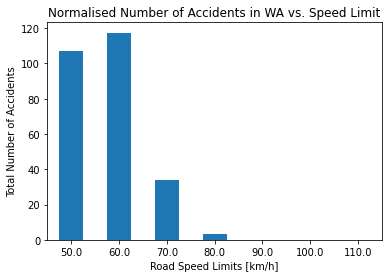

In [9]:
#Normalise accident data
total_roads=clean_speedlimit["SPEED_LIMIT"].sum()

normalised_accidents_per_speedlimit=accident_count_per_speedlimit*road_count_per_speedlimit/total_roads
normalised_accidents_per_speedlimit.plot(kind="bar", title="Normalised Number of Accidents in WA vs. Speed Limit",rot=0)
plt.ylabel("Total Number of Accidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

In [10]:
# Group Traffic DataFrame by "SEVERITY"
grouped_accidents_per_severity=clean_merged_df.groupby(["SEVERITY"])["SPEED_LIMIT"].value_counts()
grouped_accidents_per_severity

SEVERITY   SPEED_LIMIT
Fatal      60.0             192
           50.0             134
           70.0              44
           80.0              30
           40.0              21
           110.0             10
           90.0               8
           100.0              2
Hospital   60.0            2273
           70.0             856
           50.0             622
           80.0             327
           40.0             203
           110.0             28
           30.0              26
           90.0              26
           100.0             11
Medical    60.0            7325
           70.0            2846
           80.0            1193
           50.0             944
           40.0             610
           30.0             138
           110.0             16
           100.0             12
           90.0               8
PDO Major  60.0           26645
           70.0           10407
           50.0            4738
           80.0            4304
           40.0  

## Fatal Accident Analysis

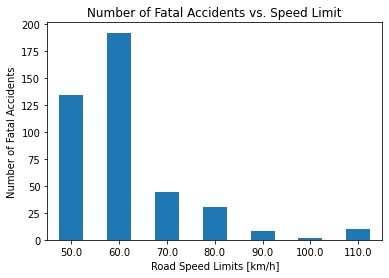

In [11]:
# Remove speed limits below 50km/h
fatal_accidents=grouped_accidents_per_severity["Fatal"].loc[grouped_accidents_per_severity["Fatal"].index>40].sort_index()

# Plot the Number of Fatal Accidents
fatal_accidents.plot(kind="bar", title="Number of Fatal Accidents vs. Speed Limit",rot=0)
plt.ylabel("Number of Fatal Accidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

## Hospital Accident Analysis

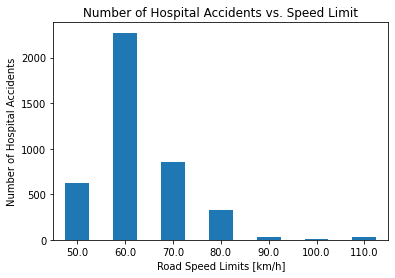

In [12]:
# Remove speed limits below 50km/h
hospital_accidents=grouped_accidents_per_severity["Hospital"].loc[grouped_accidents_per_severity["Hospital"].index>40].sort_index()

# Plot the Number of Fatal Accidents
hospital_accidents.plot(kind="bar", title="Number of Hospital Accidents vs. Speed Limit",rot=0)
plt.ylabel("Number of Hospital Accidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

## Medical Accident Analysis

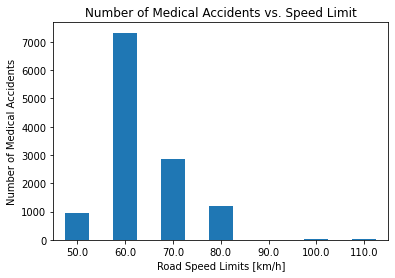

In [13]:
# Remove speed limits below 50km/h
medical_accidents=grouped_accidents_per_severity["Medical"].loc[grouped_accidents_per_severity["Medical"].index>40].sort_index()

# Plot the Number of Medical Accidents
medical_accidents.plot(kind="bar", title="Number of Medical Accidents vs. Speed Limit",rot=0)
plt.ylabel("Number of Medical Accidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

## Fatal Driving Accidents on Google Maps

In [14]:
# Location of Fatal Accidents for Specific Year
traffic_df["CRASH_YEAR"]=traffic_df["CRASH_DATE"].str.split("/",expand=True)[2].astype(float)

fatal_accident_df=traffic_df.loc[(traffic_df["SEVERITY"]=="Fatal")&(traffic_df["CRASH_YEAR"]==16)]
locations=fatal_accident_df[["LATITUDE", "LONGITUDE"]]

In [15]:
# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure()

fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure(center=(-33,117), zoom_level=7)


# Assign the marker layer to a variable
symbols = gmaps.symbol_layer(locations, fill_color="red", fill_opacity=0.3,stroke_color="red", stroke_opacity=0.3)


# Add marker layer ontop of heat map
# fig.add_layer(heat_layer)
fig.add_layer(symbols)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
# Number of Fatal Accidents per Year
traffic_df["CRASH_YEAR"]=traffic_df["CRASH_DATE"].str.split("/",expand=True)[2].astype(float)
traffic_df.loc[traffic_df["SEVERITY"]=="Fatal"]["CRASH_YEAR"].value_counts().sort_index()


16.0    171
17.0    146
18.0    143
19.0    152
20.0    134
Name: CRASH_YEAR, dtype: int64

In [17]:
## TO-DO/EXPLORE >> This is just to explore the pattern/relationship between variable to see what is happening (the overall picture) after that we can hypothesis/test these relationships and weather they have a significant impact on accidents 

# How to round/Lat-lon to narrow down traffic zones (at the moment round to 1)

# Explore the relationships between the roads/suburb (lat/lon) and: 

    # Yearly pattern of accidents 

    # Pattern of accident by season/months 

    # Patterns of accident by day/night # use bin function to separate in 3 hour intervals -- > 

## ^^ Try and do groupby.severity

# How the accidents are in relation to: 
    
    # Year (time series) 

    # Season/months 

    # Day/night 

#Vehicle type (motorcycle/truck/car - other vehicle) - this can also link to cause potentially

    # Day/night 

    # Season/month
    
    # Year 

# Idea, if we can incorporate a colour map 